In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = 'C:/Users/ASUS/OneDrive/Рабочий стол/cardox.csv'
df = pd.read_csv('C:/Users/ASUS/OneDrive/Рабочий стол/cardox.csv')

df

,date,value
0,1958-03-01,315.71
1,1958-04-01,317.45
2,1958-05-01,317.50
3,1958-06-01,317.10
4,1958-07-01,315.86
...,...,...
724,2018-07-01,408.71
725,2018-08-01,406.99
726,2018-09-01,405.51
727,2018-10-01,406.00


In [3]:
data = {
    'date': ['1958-03-01', '1958-04-01', '1958-05-01', '1958-06-01', '1958-07-01', '1958-08-01', '1958-09-01', '1958-10-01', '1958-11-01'],
    'value': [315.71, 317.45, 317.5, 317.1, 315.86, 314.93, 313.2, 312.66, 313.33]
}

In [4]:
df = pd.DataFrame(data)

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
print(df.head())

        date   value
0 1958-03-01  315.71
1 1958-04-01  317.45
2 1958-05-01  317.50
3 1958-06-01  317.10
4 1958-07-01  315.86


In [7]:
print(df.describe())

                      date       value
count                    9    9.000000
mean   1958-07-01 10:40:00  315.304444
min    1958-03-01 00:00:00  312.660000
25%    1958-05-01 00:00:00  313.330000
50%    1958-07-01 00:00:00  315.710000
75%    1958-09-01 00:00:00  317.100000
max    1958-11-01 00:00:00  317.500000
std                    NaN    1.890153


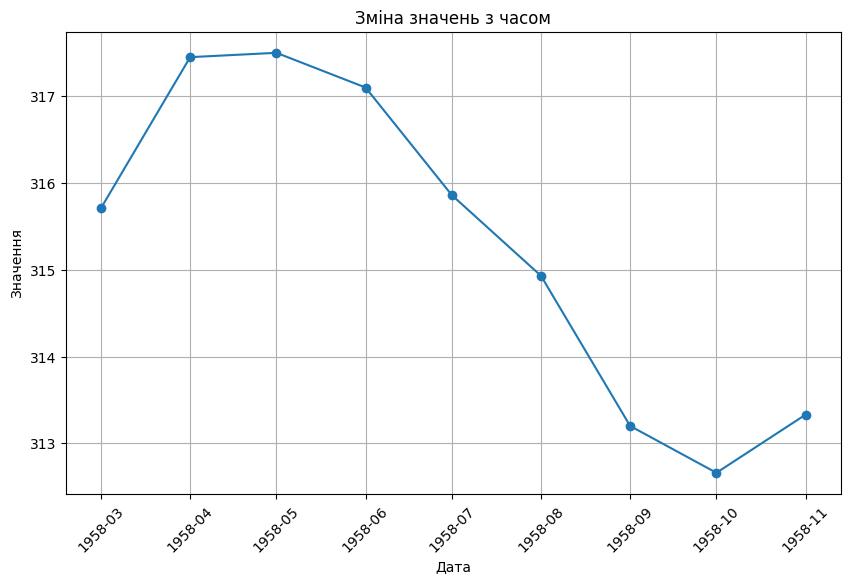

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['value'], marker='o', linestyle='-')
plt.xlabel('Дата')
plt.ylabel('Значення')
plt.title('Зміна значень з часом')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [9]:
mean_value = df['value'].mean()
std_value = df['value'].std()

In [10]:
anomalies = df[abs(df['value'] - mean_value) > 2 * std_value]

In [11]:
print("Дані з аномаліями:")
print(anomalies)

Дані з аномаліями:
Empty DataFrame
Columns: [date, value]
Index: []


In [12]:
df_cleaned = df.drop(index=anomalies.index)

In [13]:
print("Датасет після прибирання аномалій:")
print(df_cleaned)

Датасет після прибирання аномалій:
        date   value
0 1958-03-01  315.71
1 1958-04-01  317.45
2 1958-05-01  317.50
3 1958-06-01  317.10
4 1958-07-01  315.86
5 1958-08-01  314.93
6 1958-09-01  313.20
7 1958-10-01  312.66
8 1958-11-01  313.33


In [14]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [15]:
print("Датасет після декомпозиції:")
print(df)

Датасет після декомпозиції:
        date   value  year  month  day
0 1958-03-01  315.71  1958      3    1
1 1958-04-01  317.45  1958      4    1
2 1958-05-01  317.50  1958      5    1
3 1958-06-01  317.10  1958      6    1
4 1958-07-01  315.86  1958      7    1
5 1958-08-01  314.93  1958      8    1
6 1958-09-01  313.20  1958      9    1
7 1958-10-01  312.66  1958     10    1
8 1958-11-01  313.33  1958     11    1


In [16]:
df.drop_duplicates(subset=['date'], keep='first', inplace=True)

In [17]:
mean_value = df['value'].mean()
df['value'].fillna(mean_value, inplace=True)

In [18]:
print("Датасет після заповнення пропущених значень:")
print(df)

Датасет після заповнення пропущених значень:
        date   value  year  month  day
0 1958-03-01  315.71  1958      3    1
1 1958-04-01  317.45  1958      4    1
2 1958-05-01  317.50  1958      5    1
3 1958-06-01  317.10  1958      6    1
4 1958-07-01  315.86  1958      7    1
5 1958-08-01  314.93  1958      8    1
6 1958-09-01  313.20  1958      9    1
7 1958-10-01  312.66  1958     10    1
8 1958-11-01  313.33  1958     11    1


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [24]:
data = {
    'date': ['1958-03-01', '1958-04-01', '1958-05-01', '1958-06-01', '1958-07-01', '1958-08-01', '1958-09-01', '1958-10-01', '1958-11-01'],
    'value': [315.71, 317.45, 317.5, 317.1, 315.86, 314.93, 313.2, 312.66, 313.33]
}
df = pd.DataFrame(data)


In [25]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)


In [26]:
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [29]:
model = ARIMA(train, order=(1, 0, 0))  
model_fit = model.fit()

C:\Users\ASUS\anaconda3\Anakonda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS\anaconda3\Anakonda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS\anaconda3\Anakonda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [30]:
predictions = model_fit.forecast(steps=len(test))

In [31]:
rmse = mean_squared_error(test, predictions, squared=False)
print(f"RMSE: {rmse}")

RMSE: 1.0562143256465022


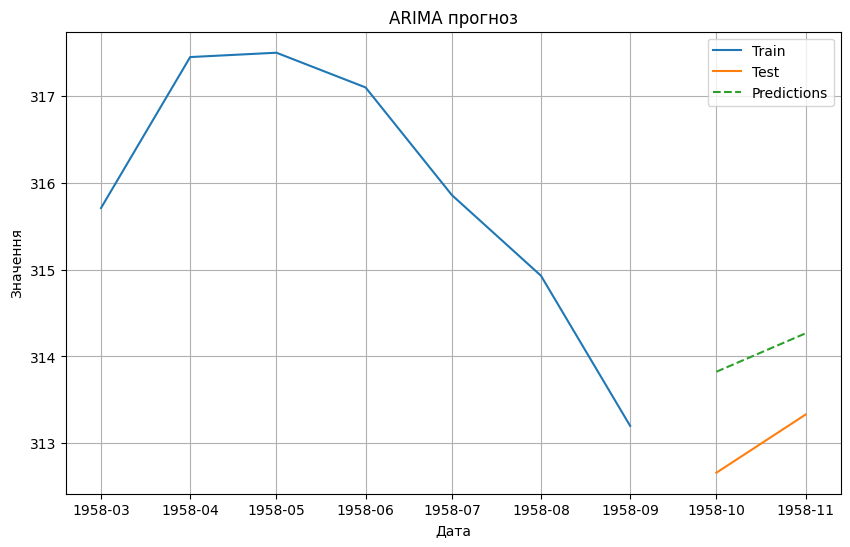

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['value'], label='Train')
plt.plot(test.index, test['value'], label='Test')
plt.plot(test.index, predictions, label='Predictions', linestyle='dashed')
plt.xlabel('Дата')
plt.ylabel('Значення')
plt.title('ARIMA прогноз')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [34]:
data = {
    'date': ['1958-03-01', '1958-04-01', '1958-05-01', '1958-06-01', '1958-07-01', '1958-08-01', '1958-09-01', '1958-10-01', '1958-11-01'],
    'value': [315.71, 317.45, 317.5, 317.1, 315.86, 314.93, 313.2, 312.66, 313.33]
}
df = pd.DataFrame(data)

In [35]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [36]:
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

In [37]:
model = ARIMA(train, order=(1, 0, 0))  
model_fit = model.fit()

C:\Users\ASUS\anaconda3\Anakonda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS\anaconda3\Anakonda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS\anaconda3\Anakonda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [38]:
predictions = model_fit.forecast(steps=len(test))

In [39]:
rmse = mean_squared_error(test, predictions, squared=False)
print(f"RMSE: {rmse}")

RMSE: 1.0562143256465022


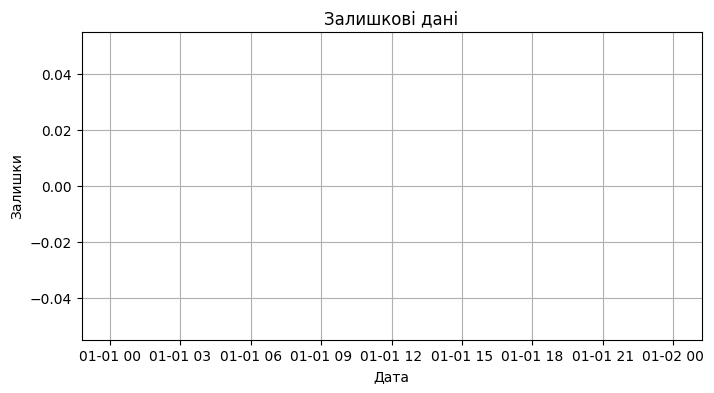

In [40]:
residuals = test - predictions
plt.figure(figsize=(8, 4))
plt.plot(residuals)
plt.title('Залишкові дані')
plt.xlabel('Дата')
plt.ylabel('Залишки')
plt.grid(True)
plt.show()

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [42]:
data = {
    'date': ['1958-03-01', '1958-04-01', '1958-05-01', '1958-06-01', '1958-07-01', '1958-08-01', '1958-09-01', '1958-10-01', '1958-11-01'],
    'value': [315.71, 317.45, 317.5, 317.1, 315.86, 314.93, 313.2, 312.66, 313.33]
}
df = pd.DataFrame(data)

In [43]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [44]:
model = ARIMA(df, order=(1, 0, 0))  
model_fit = model.fit()

C:\Users\ASUS\anaconda3\Anakonda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS\anaconda3\Anakonda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS\anaconda3\Anakonda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [45]:
forecast_periods = 30 * 12  
forecast = model_fit.forecast(steps=forecast_periods)


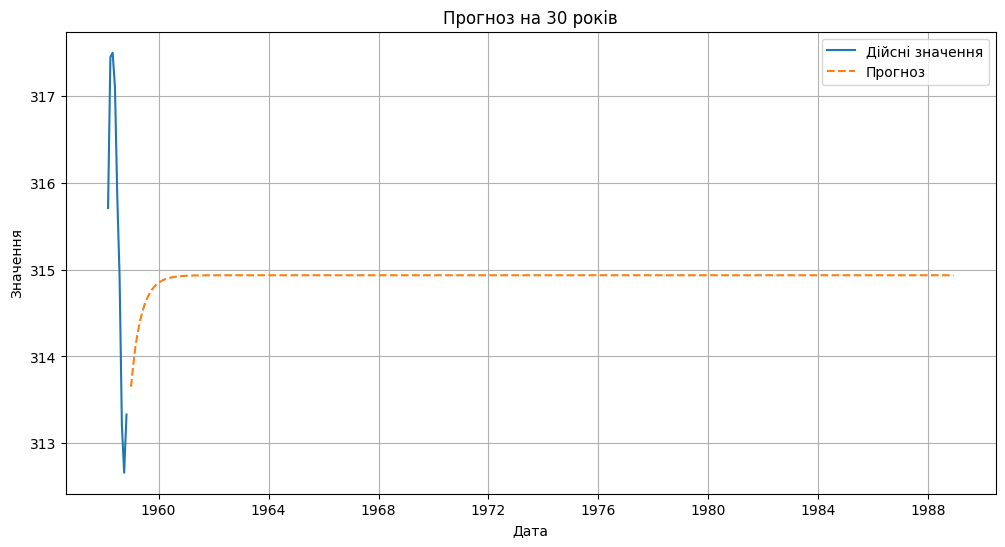

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['value'], label='Дійсні значення')
plt.plot(pd.date_range(start=df.index[-1], periods=forecast_periods + 1, freq='M')[1:], forecast, label='Прогноз', linestyle='dashed')
plt.xlabel('Дата')
plt.ylabel('Значення')
plt.title('Прогноз на 30 років')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
pip install pandas statsmodels

Note: you may need to restart the kernel to use updated packages.


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [49]:
data = {
    'date': ['1958-03-01', '1958-04-01', '1958-05-01', '1958-06-01', '1958-07-01', '1958-08-01', '1958-09-01', '1958-10-01', '1958-11-01'],
    'value': [315.71, 317.45, 317.5, 317.1, 315.86, 314.93, 313.2, 312.66, 313.33]
}
df = pd.DataFrame(data)

In [50]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [51]:
model = ARIMA(df, order=(1, 0, 0))  
model_fit = model.fit()

C:\Users\ASUS\anaconda3\Anakonda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS\anaconda3\Anakonda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS\anaconda3\Anakonda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [52]:
forecast_periods = 30 * 12  
forecast = model_fit.forecast(steps=forecast_periods)

In [53]:
forecast_dates = pd.date_range(start=df.index[-1], periods=forecast_periods + 1, freq='M')[1:]
forecast_df = pd.DataFrame({'date': forecast_dates, 'forecast_value': forecast})

In [54]:
forecast_df.to_csv('forecast_results.csv', index=False)

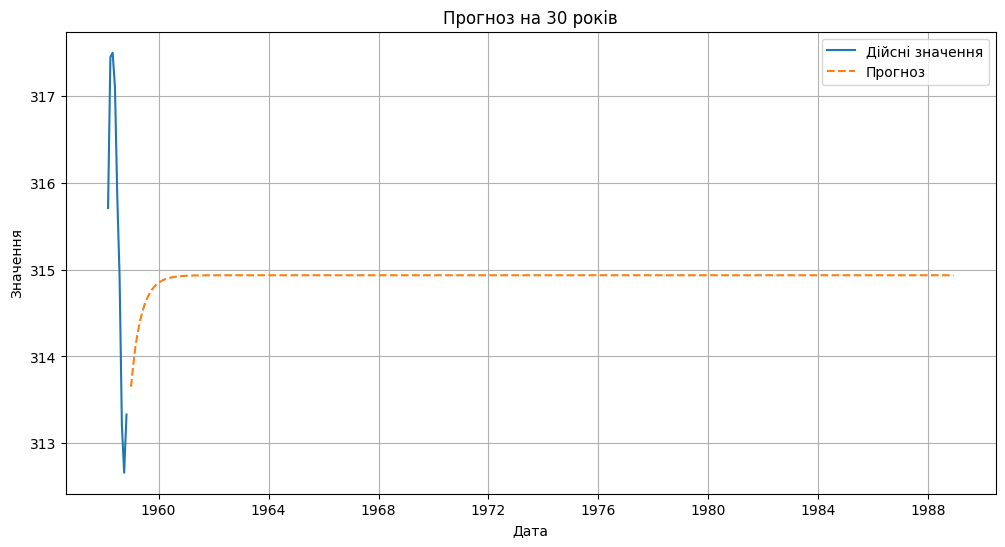

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['value'], label='Дійсні значення')
plt.plot(forecast_dates, forecast, label='Прогноз', linestyle='dashed')
plt.xlabel('Дата')
plt.ylabel('Значення')
plt.title('Прогноз на 30 років')
plt.legend()
plt.grid(True)
plt.show()